# DETECTING SEXIST COMMENTS IN TWEETS

Β' ΕΞΑΜΗΝΟ

ΜΑΘΗΜΑ: M908



In [1]:
# Import necessary libraries
import csv
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import nltk
from nltk.probability import FreqDist
from matplotlib import pyplot as plt

In [2]:
tsv_file = open('sexism.tsv', 'r',encoding='utf-8') # open file in tsv.format with encoding UTF-8
read_file = csv.DictReader(tsv_file, delimiter='\t') # read file with the proper delimiter

headings = next(read_file)
print(headings) 
print()
print('Number of headers:',len(headings))

records = [] # create an empty list for all the file records 

for row in read_file: # iterate every row in the tsv file
    #print(row) 
    records.append(row) # fill in the empty list with all the rows

print('Number of records:', len(records))
print('\nrecord:\n',records[489])
print('\nrecord:\n',records[526])
print('\nrecord:\n',records[714])
print('\nrecord:\n',records[10])

{'ID': '0', 'Label': 'NO', 'Keywords/Query': 'αντρικές δουλειές'}

Number of headers: 3
Number of records: 779

record:
 {'ID': '492', 'Label': 'IH', 'Keywords/Query': 'γυναίκες βάψιμο'}

record:
 {'ID': '529', 'Label': 'PH', 'Keywords/Query': 'ξύρισμα άντρες'}

record:
 {'ID': '717', 'Label': 'SH', 'Keywords/Query': 'γυμνός'}

record:
 {'ID': '11', 'Label': 'NO', 'Keywords/Query': 'αντρικές δουλειές'}


In [3]:
filename = 'sexism.tsv'
dataframe = pd.read_csv(filename, encoding='utf-8', delimiter='\t', decimal = ',')
dataframe

,ID,Label,Keywords/Query
0,0,NO,αντρικές δουλειές
1,1,PH,αντρικές δουλειές
2,2,IH,αντρικές δουλειές
3,3,IH,αντρικές δουλειές
4,4,IH,αντρικές δουλειές
...,...,...,...
775,777,IH,γυναικείο σώμα
776,778,NO,γυναικείο σώμα
777,779,NO,γυναικείο σώμα
778,780,NO,γυναικείο σώμα


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              780 non-null    int64 
 1   Label           780 non-null    object
 2   Keywords/Query  780 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.4+ KB


In [5]:
keys = dataframe.keys() 

for key in keys:
    df_len = len(dataframe[key].unique()) # the length of the unique values of each column
    print("{0:25}{1:10}".format(key,df_len))
    
# The values in 'Label' should be 5 if we include the non-labelled tweets which are '-', so it must be a mistake

ID                              780
Label                             7
Keywords/Query                   55


In [6]:
# Let's check these values to locate the mistake

dataframe['Label'].unique()

array(['NO', 'PH', 'IH', 'ΙΗ', 'ΝΟ', 'SH', '-'], dtype=object)

In [7]:
# Fix the values in label category as the IH and NO values were both in Greek and in English

dict = {'ΝΟ': 'NO', 'NO':'NO', 'IH':'IH', 'ΙΗ':'IH', '-':'-', 'SH':'SH', 'PH':'PH', 'SH':'SH'}

dataframe['Label']= dataframe['Label'].map(dict) # replace the values with the new values in dict

dataframe.drop(dataframe.index[dataframe['Keywords/Query'] == 'χαζός'], inplace = True) # drop the 'χαζός' keyword which is '-'

dataframe['Label'].unique()

array(['NO', 'PH', 'IH', 'SH'], dtype=object)

In [8]:
keys = dataframe.keys() 

for key in keys:
    df_len = len(dataframe[key].unique()) # the length of the unique values of each column
    print("{0:25}{1:10}".format(key,df_len))

# Everything seems ok now!

ID                              753
Label                             4
Keywords/Query                   54


In [9]:
print(dataframe['Keywords/Query'].mode()) # Find the more frequent values in the column
print()
print()
print(dataframe['Keywords/Query'].value_counts().sort_values(ascending = False)) # Count the various values in column

0               metoo
1    από φωνή κορμάρα
dtype: object


metoo                                       40
από φωνή κορμάρα                            40
γυναικείο σώμα                              34
γυναικείες δουλειές                         32
fuck                                        29
τοξικότητα                                  29
fuck you                                    28
παρενόχληση                                 26
αντρικές δουλειές                           24
δούλα και κυρά                              23
bitch                                       23
δουλάρες                                    20
σεξισμός                                    20
νοικοκυρές                                  20
κούκλα γυναίκα                              19
ντελικάτες                                  19
δούλες στο σπίτι                            19
γυναίκες οδηγοί                             19
γυμνός                                      18
ξανθιές                                     16


# Create the plots for the Label and the Keywords

<AxesSubplot:>

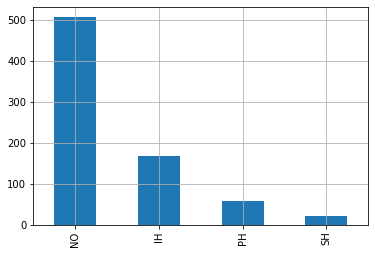

In [10]:
dataframe['Label'].value_counts().plot(kind='bar', grid = True) # Plot it to view the results visually

Counter({'NO': 507, 'IH': 168, 'PH': 57, 'SH': 21})


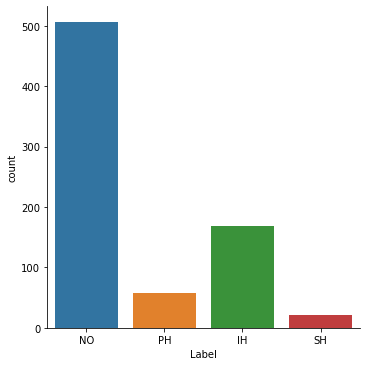

In [11]:
freq_labels = Counter(dataframe['Label'])
print(freq_labels)
sns.catplot(x='Label', kind='count', data=dataframe)

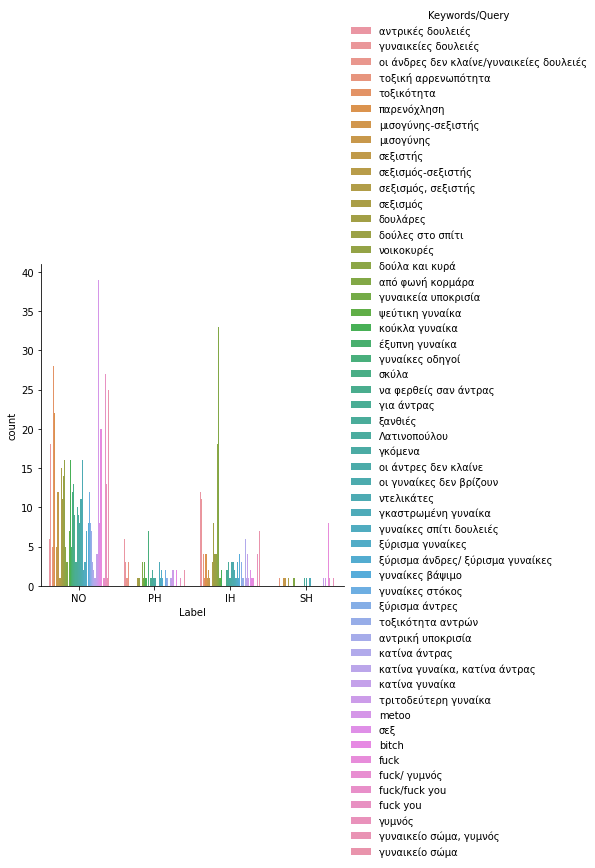

In [12]:
sns.catplot(x='Label', hue='Keywords/Query', kind='count', data=dataframe)

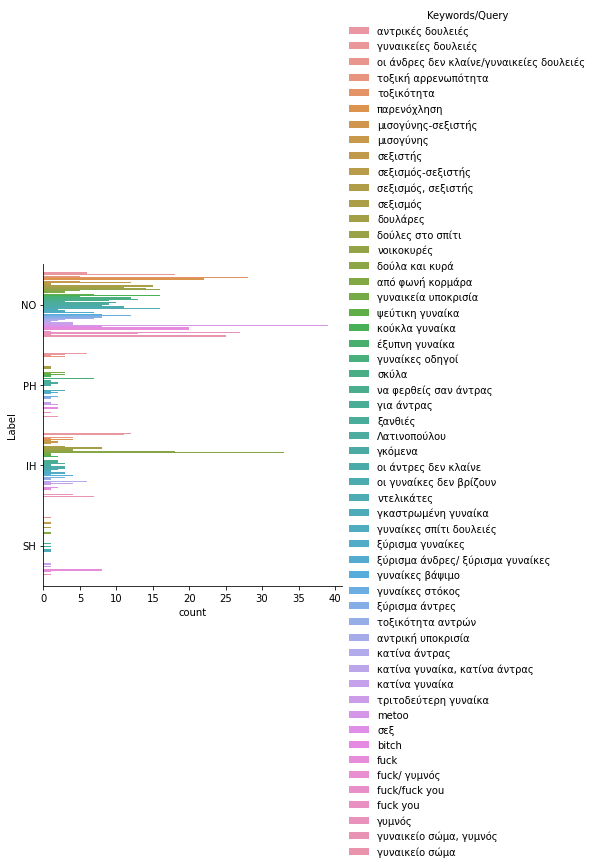

In [13]:
sns.catplot(y='Label', hue='Keywords/Query', kind='count', data=dataframe)

In [14]:
freq = Counter(dataframe['Keywords/Query'])
print(freq)

#keys = list(freq.keys())

#values = list(freq.values())

#sns.barplot(list(freq.keys()), list(freq.values()))

Counter({'από φωνή κορμάρα': 40, 'metoo': 40, 'γυναικείο σώμα': 34, 'γυναικείες δουλειές': 32, 'τοξικότητα': 29, 'fuck': 29, 'fuck you': 28, 'παρενόχληση': 26, 'αντρικές δουλειές': 24, 'δούλα και κυρά': 23, 'bitch': 23, 'σεξισμός': 20, 'δουλάρες': 20, 'νοικοκυρές': 20, 'δούλες στο σπίτι': 19, 'κούκλα γυναίκα': 19, 'γυναίκες οδηγοί': 19, 'ντελικάτες': 19, 'γυμνός': 18, 'ξανθιές': 16, 'σεξιστής': 14, 'οι άντρες δεν κλαίνε': 14, 'οι γυναίκες δεν βρίζουν': 14, 'γυναίκες στόκος': 14, 'τοξική αρρενωπότητα': 13, 'σκύλα': 13, 'να φερθείς σαν άντρας': 12, 'ξύρισμα γυναίκες': 12, 'γυναίκες βάψιμο': 12, 'ξύρισμα άντρες': 12, 'ψεύτικη γυναίκα': 11, 'Λατινοπούλου': 11, 'γκόμενα': 11, 'κατίνα γυναίκα': 10, 'σεξ': 10, 'τοξικότητα αντρών': 9, 'μισογύνης': 8, 'κατίνα άντρας': 8, 'γκαστρωμένη γυναίκα': 7, 'τριτοδεύτερη γυναίκα': 7, 'για άντρας': 6, 'έξυπνη γυναίκα': 5, 'γυναίκες σπίτι δουλειές': 5, 'αντρική υποκρισία': 3, 'κατίνα γυναίκα, κατίνα άντρας': 3, 'γυναικεία υποκρισία': 2, 'ξύρισμα άνδρες/ ξύρ

In [15]:
# Get the values for each category separately

NO = dataframe[dataframe["Label"] == "NO"]
NO = NO['Keywords/Query'].value_counts().sort_values(ascending = False) 
top10_no= NO.head(10)
print(top10_no)
print()

PH = dataframe[dataframe["Label"] == "PH"]
PH = PH['Keywords/Query'].value_counts().sort_values(ascending = False)
top10_ph = PH.head(10)
print(top10_ph)

print()
IH = dataframe[dataframe["Label"] == "IH"]
IH= IH['Keywords/Query'].value_counts().sort_values(ascending = False) 
top10_ih = IH.head(10)
print(top10_ih)

print()
SH = dataframe[dataframe["Label"] == "SH"]
SH = SH['Keywords/Query'].value_counts().sort_values(ascending = False)
top10_sh = SH.head(10)
print(top10_sh)

metoo                  39
τοξικότητα             28
fuck you               27
γυναικείο σώμα         25
παρενόχληση            22
bitch                  20
fuck                   20
γυναικείες δουλειές    18
ντελικάτες             16
νοικοκυρές             16
Name: Keywords/Query, dtype: int64

γυναίκες οδηγοί        7
αντρικές δουλειές      6
γκαστρωμένη γυναίκα    3
ψεύτικη γυναίκα        3
τοξική αρρενωπότητα    3
γυναικείες δουλειές    3
από φωνή κορμάρα       3
γυναίκες στόκος        2
bitch                  2
γυναικείο σώμα         2
Name: Keywords/Query, dtype: int64

από φωνή κορμάρα       33
δούλα και κυρά         18
αντρικές δουλειές      12
γυναικείες δουλειές    11
δουλάρες                8
γυναικείο σώμα          7
κατίνα άντρας           6
γυναίκες βάψιμο         4
τοξική αρρενωπότητα     4
παρενόχληση             4
Name: Keywords/Query, dtype: int64

fuck                   8
σεξιστής               1
γυμνός                 1
ξανθιές                1
ντελικάτες            

Text(0.5, 1.0, 'The NO values')

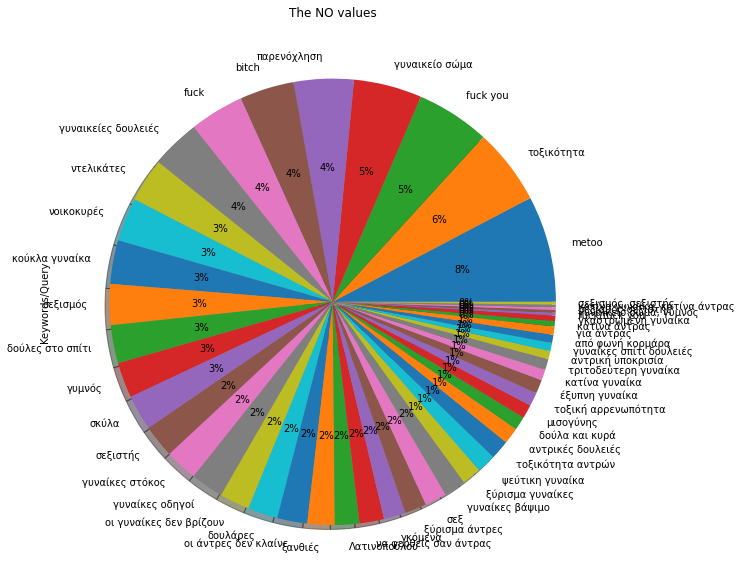

In [16]:
plot1 = NO.plot.pie(subplots=True,shadow=True,autopct='%1.0f%%',figsize=(10, 20))
plt.title('The NO values')
# Since the pie plot with all the values is not legible and most percentages are very low, we decided to plot the top 10 for each category.

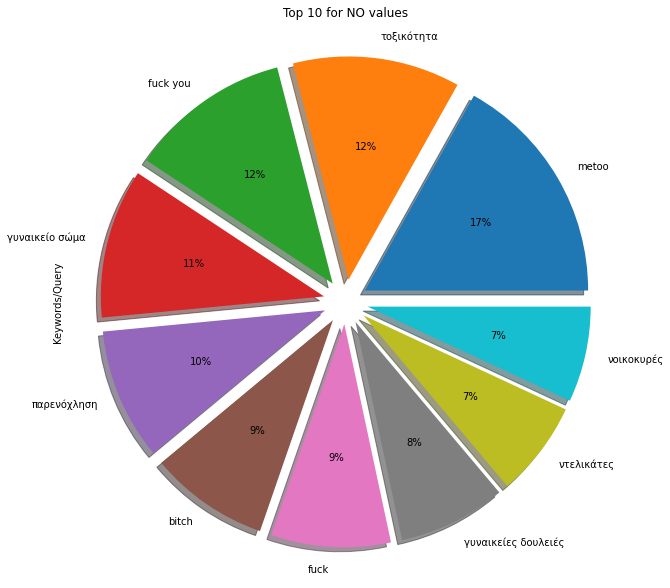

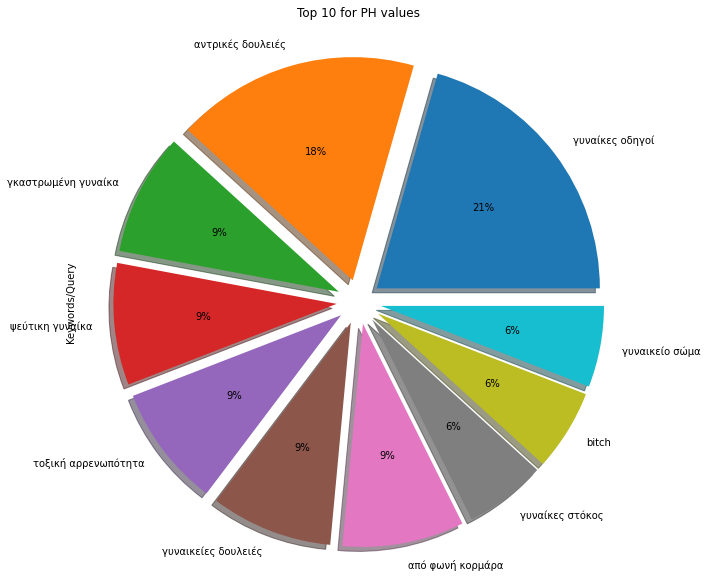

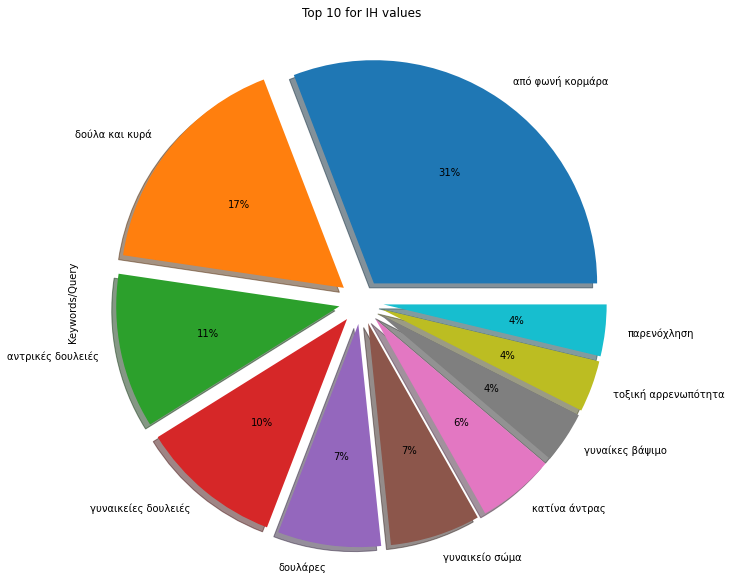

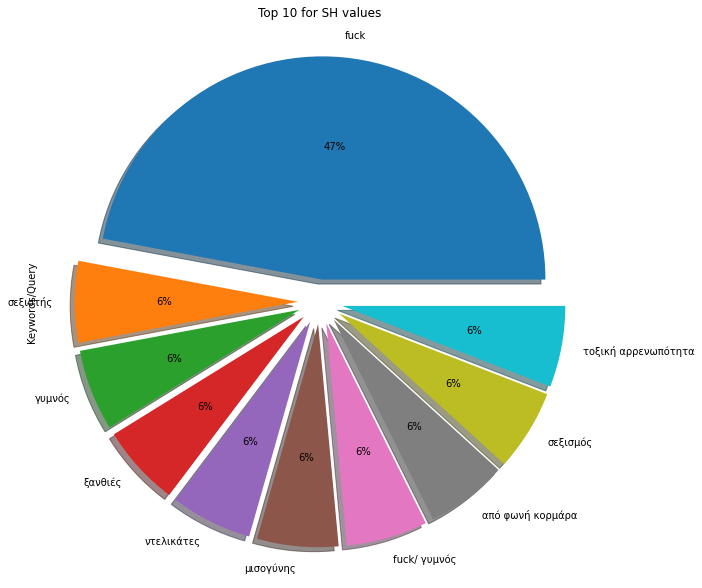

In [17]:
# Create pie plots for each category

plot1 = top10_no.plot.pie(subplots=True,shadow=True,explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1),autopct='%1.0f%%',figsize=(10, 20))
plt.title('Top 10 for NO values')

plt.show()
plot2 = top10_ph.plot.pie(subplots=True,shadow=True,explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1),autopct='%1.0f%%',figsize=(10, 20))
plt.title('Top 10 for PH values')

plt.show()
plot3 = top10_ih.plot.pie(subplots=True,shadow=True,explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1),autopct='%1.0f%%',figsize=(10, 20))
plt.title('Top 10 for IH values')

plt.show()
plot4 = top10_sh.plot.pie(subplots=True,shadow=True,explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1),autopct='%1.0f%%',figsize=(10, 20))
plt.title('Top 10 for SH values')

plt.show()